In [ ]:
# %cd /content/drive/MyDrive/MachineLearningProject
# !unzip /content/drive/MyDrive/MachineLearningProject/YOLOv9_model/results1.zip
# !rm /content/drive/MyDrive/MachineLearningProject/YOLOv9_model/results1.zip

# %cd /content/drive/MyDrive/MachineLearningProject/DETR_model
# !unzip /content/drive/MyDrive/MachineLearningProject/DETR_model/results2.zip
# !rm /content/drive/MyDrive/MachineLearningProject/DETR_model/results2.zip

# %cd /content/drive/MyDrive/MachineLearningProject/Data/YOLO_data
# !unzip /content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/BrainTumorDetection.v3i.yolov9.zip
# !rm /content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/BrainTumorDetection.v3i.yolov9.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/2192_jpg.rf.55ece93d148f37951fdc17c19b0c1aa3.jpg  
 extracting: train/images/2192_jpg.rf.6bc0445062e8eead9c7a968ce6b30170.jpg  
 extracting: train/images/2193_jpg.rf.379f66f3aae9cd2e4351213ad5f32860.jpg  
 extracting: train/images/2193_jpg.rf.d3b0b06113ef1a2b87f0f965530d8dbf.jpg  
 extracting: train/images/2194_jpg.rf.daf4c3c78f61248d58fe699a3f9a58f4.jpg  
 extracting: train/images/2194_jpg.rf.ef02a22b925482b38dd9e9e09f362264.jpg  
 extracting: train/images/2196_jpg.rf.2556e8ff7c2fade6f769a41058165c0c.jpg  
 extracting: train/images/2196_jpg.rf.d19d8bccc5871dca75bd29208a5b7374.jpg  
 extracting: train/images/2197_jpg.rf.455553baf8437e98a8b9918129d4b619.jpg  
 extracting: train/images/2197_jpg.rf.fc5d852c3cb3d033f914f1bc5c177571.jpg  
 extracting: train/images/2199_jpg.rf.884dfeeef57c7f43d9a4cfee1b4a3979.jpg  
 extracting: train/images/2199_jpg.rf.ab01cc29b1b202ea5d5417dd9bfd8b55.jpg  
 extracting: train/images

### Begin

In [ ]:
!pip install pycocotools

In [ ]:
# Install environment
!pip install -i https://test.pypi.org/simple/ supervision==0.3.0
!pip install -q transformers
!pip install -q pytorch-lightning
!pip install -q roboflow
!pip install -q timm

Looking in indexes: https://test.pypi.org/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.3/802.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.0 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 42.6 MB/s eta 0:00:00


In [ ]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

import roboflow
import supervision
import transformers
import pytorch_lightning
import matplotlib.pyplot as plt
import cv2
import json

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.3 ; cuda:  cu121


In [ ]:
import supervision as sv

# Prepare

In [ ]:
from transformers import DetrForObjectDetection, DetrImageProcessor

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
CHECKPOINT = 'facebook/detr-resnet-50'
image_processor = DetrImageProcessor.from_pretrained(CHECKPOINT)



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

In [ ]:
import os
import torchvision

dataset_location = '/content/drive/MyDrive/MachineLearningProject/Data/DETR_data/DETR_dataset'
# settings
ANNOTATION_FILE_NAME = "_annotations.coco.json"
TRAIN_DIRECTORY = os.path.join(dataset_location, "train")
VAL_DIRECTORY = os.path.join(dataset_location, "valid")
TEST_DIRECTORY = os.path.join(dataset_location, "test")


class CocoDetection(torchvision.datasets.CocoDetection):
    def __init__(
        self,
        image_directory_path: str,
        image_processor,
        train: bool = True
    ):
        annotation_file_path = os.path.join(image_directory_path, ANNOTATION_FILE_NAME)
        super(CocoDetection, self).__init__(image_directory_path, annotation_file_path)
        self.image_processor = image_processor

    def __getitem__(self, idx):
        images, annotations = super(CocoDetection, self).__getitem__(idx)
        image_id = self.ids[idx]
        annotations = {'image_id': image_id, 'annotations': annotations}
        encoding = self.image_processor(images=images, annotations=annotations, return_tensors="pt")
        pixel_values = encoding["pixel_values"].squeeze()
        target = encoding["labels"][0]

        return pixel_values, target

TEST_DATASET = CocoDetection(
    image_directory_path=TEST_DIRECTORY,
    image_processor=image_processor,
    train=False)

# print("Number of training examples:", len(TRAIN_DATASET))
# print("Number of validation examples:", len(VAL_DATASET))
print("Number of test examples:", len(TEST_DATASET))

loading annotations into memory...
Done (t=3.47s)
creating index...
index created!
Number of test examples: 214


In [ ]:
from torch.utils.data import DataLoader

def collate_fn(batch):
    # DETR authors employ various image sizes during training, making it not possible
    # to directly batch together images. Hence they pad the images to the biggest
    # resolution in a given batch, and create a corresponding binary pixel_mask
    # which indicates which pixels are real/which are padding
    pixel_values = [item[0] for item in batch]
    encoding = image_processor.pad(pixel_values, return_tensors="pt")
    labels = [item[1] for item in batch]
    return {
        'pixel_values': encoding['pixel_values'],
        'pixel_mask': encoding['pixel_mask'],
        'labels': labels
    }

TEST_DATALOADER = DataLoader(dataset=TEST_DATASET, collate_fn=collate_fn, batch_size=16)

### Choose test image

In [ ]:
import random
import cv2
import numpy as np


# select random image
image_ids = TEST_DATASET.coco.getImgIds()
image_id = random.choice(image_ids)
print('Image #{}'.format(image_id))

# load image and annotatons
image = TEST_DATASET.coco.loadImgs(image_id)[0]
annotations = TEST_DATASET.coco.imgToAnns[image_id]
IMAGE_PATH = os.path.join(TEST_DATASET.root, image['file_name'])
IMAGE = image['file_name']

Image #183


# Evaluate on test data

### DETR

In [ ]:
def convert_to_xywh(boxes):
    xmin, ymin, xmax, ymax = boxes.unbind(1)
    return torch.stack((xmin, ymin, xmax - xmin, ymax - ymin), dim=1)

def prepare_for_coco_detection(predictions):
    coco_results = []
    for original_id, prediction in predictions.items():
        if len(prediction) == 0:
            continue

        boxes = prediction["boxes"]
        boxes = convert_to_xywh(boxes).tolist()
        scores = prediction["scores"].tolist()
        labels = prediction["labels"].tolist()

        coco_results.extend(
            [
                {
                    "image_id": original_id,
                    "category_id": labels[k],
                    "bbox": box,
                    "score": scores[k],
                }
                for k, box in enumerate(boxes)
            ]
        )
    return coco_results

In [ ]:
!pip install timm

In [ ]:
MODEL_PATH = '/content/drive/MyDrive/MachineLearningProject/DETR_model/DETR_finetuned'
CONFIDENCE_TRESHOLD = 0.25
IOU_TRESHOLD = 0.8

model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
model.to(DEVICE)

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

In [ ]:
!pip install -q coco_eval

  Preparing metadata (setup.py) ... done


In [ ]:
from coco_eval import CocoEvaluator
from tqdm.notebook import tqdm

import numpy as np

evaluator = CocoEvaluator(coco_gt=TEST_DATASET.coco, iou_types=["bbox"])

print("Running evaluation...")

for idx, batch in enumerate(tqdm(TEST_DATALOADER)):
    pixel_values = batch["pixel_values"].to(DEVICE)
    pixel_mask = batch["pixel_mask"].to(DEVICE)
    labels = [{k: v.to(DEVICE) for k, v in t.items()} for t in batch["labels"]]

    with torch.no_grad():
      outputs = model(pixel_values=pixel_values, pixel_mask=pixel_mask)

    orig_target_sizes = torch.stack([target["orig_size"] for target in labels], dim=0)
    results = image_processor.post_process_object_detection(outputs, target_sizes=orig_target_sizes)

    predictions = {target['image_id'].item(): output for target, output in zip(labels, results)}
    predictions = prepare_for_coco_detection(predictions)
    evaluator.update(predictions)

evaluator.synchronize_between_processes()
evaluator.accumulate()
evaluator.summarize()

Running evaluation...


  0%|          | 0/14 [00:00<?, ?it/s]

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Accumulating evaluation results...
DONE (t=0.04s).
IoU metric: bbox
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.412
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.753
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.466
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.353
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.456
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.466
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.528
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.460
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= 

###YOLOv9

In [ ]:
%cd /content/drive/MyDrive/yolov9
# evaluate converted yolov9 models
# python val.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 --weights './yolov9-c-converted.pt' --save-json --name yolov9_c_c_640_val
data_path ="/content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/data.yaml"
weight_path ="/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/yolov9-c-ver/weights/best.pt"
eval_save_path ="/content"
name_eval = "yolov9_eval"
# evaluate yolov9 models

!python val_dual.py --data {data_path} --img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 --weights {weight_path} --task "test" --save-json --project {eval_save_path} --name {name_eval} --exist-ok
# evaluate gelan models
# python val.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 --weights './gelan-c.pt' --save-json --name gelan_c_640_val

/content/drive/MyDrive/yolov9
val_dual: data=/content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/data.yaml, weights=['/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/yolov9-c-ver/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.7, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=/content, name=yolov9_eval, exist_ok=True, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLO 🚀 v0.1-88-g03f920b Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv9-yolov9-c summary: 604 layers, 50698278 parameters, 0 gradients
test: Scanning /content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/test/labels.cache... 214 images, 0 backgrounds, 0 corrupt: 100% 214/214 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R   

###GELAN-c

In [ ]:
%cd /content/drive/MyDrive/yolov9
# evaluate converted yolov9 models
# python val.py --data data/coco.yaml --img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 --weights './yolov9-c-converted.pt' --save-json --name yolov9_c_c_640_val
data_path ="/content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/data.yaml"
weight_path ="/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/gelan-c/weights/best.pt"
eval_save_path ="/content"
name_eval = "gelan_eval"

# evaluate gelan models
!python val.py --data {data_path} --img 640 --batch 8 --conf 0.25 --iou 0.7 --device 0 --weights {weight_path} --task "test" --save-json --save-txt --project {eval_save_path} --name {name_eval} --exist-ok

/content/drive/MyDrive/yolov9
val: data=/content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/data.yaml, weights=['/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/gelan-c/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.25, iou_thres=0.7, max_det=300, task=test, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=False, save_json=True, project=/content, name=gelan_eval, exist_ok=True, half=False, dnn=False, min_items=0
WARNING ⚠️ confidence threshold 0.25 > 0.001 produces invalid results
YOLO 🚀 v0.1-88-g03f920b Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv9-gelan-c summary: 387 layers, 25227859 parameters, 0 gradients
test: Scanning /content/drive/MyDrive/MachineLearningProject/Data/YOLO_data/test/labels.cache... 214 images, 0 backgrounds, 0 corrupt: 100% 214/214 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mA

# Plot Ground Truth

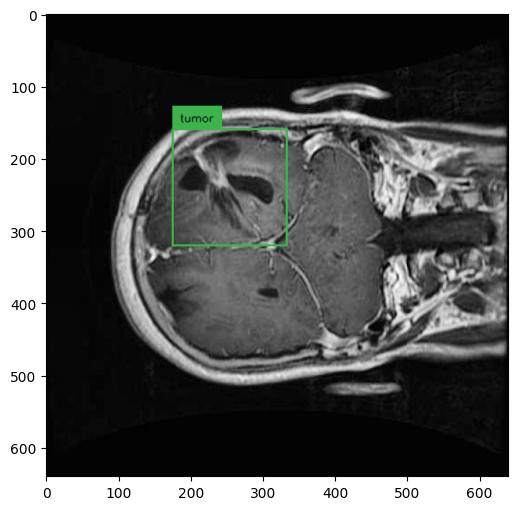

In [ ]:
# annotate
gt_detections = sv.Detections.from_coco_annotations(coco_annotation=annotations)
test_img  = cv2.imread(IMAGE_PATH)

# we will use id2label function for training
categories = TEST_DATASET.coco.cats
id2label = {k: v['name'] for k,v in categories.items()}

labels = [
    f"{id2label[class_id]}"
    for _, _, class_id, _
    in gt_detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=test_img, detections=gt_detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(test_img, (6, 6))

# Testing with YOLOv9 - c

/content/drive/MyDrive/yolov9
detect_dual: weights=['/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/yolov9-c-ver/weights/best.pt'], source=/content/drive/MyDrive/DETR_data/DETR_dataset/test/1933_jpg.rf.74de2f7fb7d5533819b88da8464f9186.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content, name=test_yolov9, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-88-g03f920b Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv9-yolov9-c summary: 604 layers, 50698278 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/DETR_data/DETR_dataset/test/1933_jpg.rf.74de2f7fb7d5533819b88da8464f9186.jpg: 640x640 1 tumor, 6155.2ms
Speed: 1.9ms pre-process, 6155.2ms inference, 1.1ms NMS per im

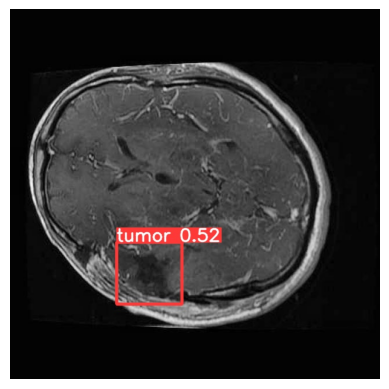

In [ ]:
# inference converted yolov9 models
import os
%cd /content/drive/MyDrive/yolov9

weight_path = '/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/yolov9-c-ver/weights/best.pt'
save_path = '/content'
name_detect = 'test_yolov9'
!python detect_dual.py --weights {weight_path} --source {IMAGE_PATH} --project {save_path} --name {name_detect} --exist-ok

detect_path = os.path.join(save_path,name_detect,IMAGE)
yolov9_detected_image = cv2.imread(detect_path)
# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
# This step is necessary for proper color display in pyplot
yolov9_detected_image = cv2.cvtColor(yolov9_detected_image, cv2.COLOR_BGR2RGB)

# Display the image using pyplot
plt.imshow(yolov9_detected_image)

# Optional customizations (e.g., title, axis labels)
# plt.title("My Image")
plt.axis("off")  # Hide axes for cleaner presentation (optional)

# Display the plot
plt.show()


# Testing with GELAN-c

/content/drive/MyDrive/yolov9
detect: weights=['/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/gelan-c/weights/best.pt'], source=/content/drive/MyDrive/DETR_data/DETR_dataset/test/1933_jpg.rf.74de2f7fb7d5533819b88da8464f9186.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content, name=test_gelan-c, exist_ok=True, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-88-g03f920b Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
YOLOv9-gelan-c summary: 387 layers, 25227859 parameters, 0 gradients
image 1/1 /content/drive/MyDrive/DETR_data/DETR_dataset/test/1933_jpg.rf.74de2f7fb7d5533819b88da8464f9186.jpg: 640x640 1 tumor, 3928.4ms
Speed: 1.8ms pre-process, 3928.4ms inference, 1.9ms NMS per image at sha

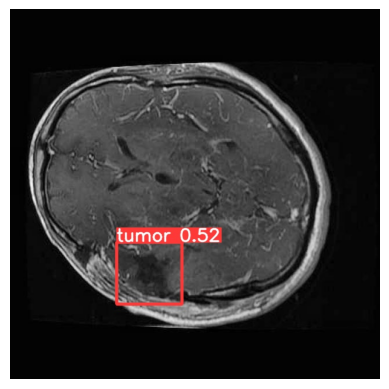

In [ ]:
# inference converted yolov9 models
import os
%cd /content/drive/MyDrive/yolov9

weight_path = '/content/drive/MyDrive/MachineLearningProject/YOLOv9_model/gelan-c/weights/best.pt'
save_path = '/content'
name_detect = 'test_gelan-c'
!python detect.py --weights {weight_path} --source {IMAGE_PATH} --project {save_path} --name {name_detect} --exist-ok

gelan_detect_path = os.path.join(save_path,name_detect,IMAGE)
gelan_c_detected_image = cv2.imread(detect_path)
# Convert the image from BGR (OpenCV format) to RGB (Matplotlib format)
# This step is necessary for proper color display in pyplot
gelan_c_detected_image = cv2.cvtColor(gelan_c_detected_image, cv2.COLOR_BGR2RGB)

# Display the image using pyplot
plt.imshow(gelan_c_detected_image)

# Optional customizations (e.g., title, axis labels)
# plt.title("My Image")
plt.axis("off")  # Hide axes for cleaner presentation (optional)

# Display the plot
plt.show()


# Testing with DETR

## Load fine-tuned model

In [ ]:
import torch
from transformers import DetrForObjectDetection, DetrImageProcessor


# settings

MODEL_PATH = '/content/drive/MyDrive/MachineLearningProject/DETR_model/DETR_finetuned'
CONFIDENCE_TRESHOLD = 0.5
IOU_TRESHOLD = 0.8

model = DetrForObjectDetection.from_pretrained(MODEL_PATH)
model.to(DEVICE)

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

## Inference

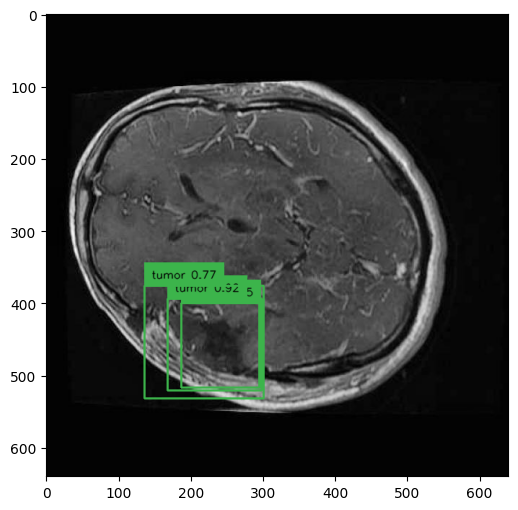

In [ ]:
import cv2
import torch
import supervision as sv


with torch.no_grad():

    # load image and predict
    image = cv2.imread(IMAGE_PATH)
    inputs = image_processor(images=image, return_tensors='pt').to(DEVICE)
    outputs = model(**inputs)

    # post-process
    target_sizes = torch.tensor([image.shape[:2]]).to(DEVICE)
    results = image_processor.post_process_object_detection(
        outputs=outputs,
        threshold=CONFIDENCE_TRESHOLD,
        target_sizes=target_sizes
    )[0]

# annotate
detections = sv.Detections.from_transformers(transformers_results=results).with_nms(threshold=IOU_TRESHOLD)

labels = [
    f"{model.config.id2label[class_id]} {confidence:0.2f}"
    for _, confidence, class_id, _
    in detections
]

box_annotator = sv.BoxAnnotator()
frame = box_annotator.annotate(scene=image, detections=detections, labels=labels)

%matplotlib inline
sv.show_frame_in_notebook(frame, (6, 6))